# Análise de Cluster

MBA em Data Science e Analytics USP ESALQ

Prof. Dr. Wilson Tarantin Junior

-*- coding: utf-8 -*-

In [2]:
# Instalando os pacotes.

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install scipy
# !pip install scikit-learn
# !pip install pingouin

In [3]:
# Importando os pacotes.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.io as pio

In [4]:
# Importando o banco de dados.

url = 'https://github.com/filipecarbonera/MBA_USP_Data_Science_Analytics/raw/main/Clustering/vestibular.xlsx'
# Fonte: Fávero & Belfiore (2024, Capítulo 9)

dados_vest = pd.read_excel(url)
dados_vest

,estudante,matemática,física,química
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patrícia,8.9,1.0,2.7
3,Ovídio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


In [5]:
# Visualizando informações sobre os dados e variáveis.
dados_vest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudante   5 non-null      object 
 1   matemática  5 non-null      float64
 2   física      5 non-null      float64
 3   química     5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 288.0+ bytes


In [7]:
# Estatísticas descritivas das variáveis.
dados_vest.describe()

,matemática,física,química
count,5.000000,5.000000,5.000000
mean,6.160000,2.940000,5.460000
std,2.478508,2.918561,3.510413
min,3.400000,1.000000,1.500000
25%,3.700000,1.000000,2.700000
50%,7.000000,2.000000,5.000000
75%,7.800000,2.700000,9.000000
max,8.900000,8.000000,9.100000


Note que as variáveis já possuem a mesma escala (são notas de 0 a 10).

In [10]:
# Gráfico 3D das observações.
fig = px.scatter_3d(dados_vest, x='matemática', y='química', z='física', text=dados_vest.estudante)
fig.show()

In [14]:
# Selecionado apenas variáveis métricas.
vest = dados_vest.drop(columns=['estudante'])
vest

,matemática,física,química
0,3.7,2.7,9.1
1,7.8,8.0,1.5
2,8.9,1.0,2.7
3,7.0,1.0,9.0
4,3.4,2.0,5.0


Deve ser realizada a seguinte parametrização:
- Número de clusters (n_clusters)
- Medida de distância (metric)
- Método de encadeamento (linkage)

Opções para as distâncias ("metric"):
- euclidean
- sqeuclidean
- cityblock
- chebyshev
- canberra
- correlation

Opções para o método de encadeamento ("method"):
- single
- complete
- average

Opções para as distâncias ("metric"):
- euclidean
- sqeuclidean
- cityblock
- chebyshev
- canberra
- correlation

# Cluster hierárquico aglomerativo: distância euclidiana + single linkage

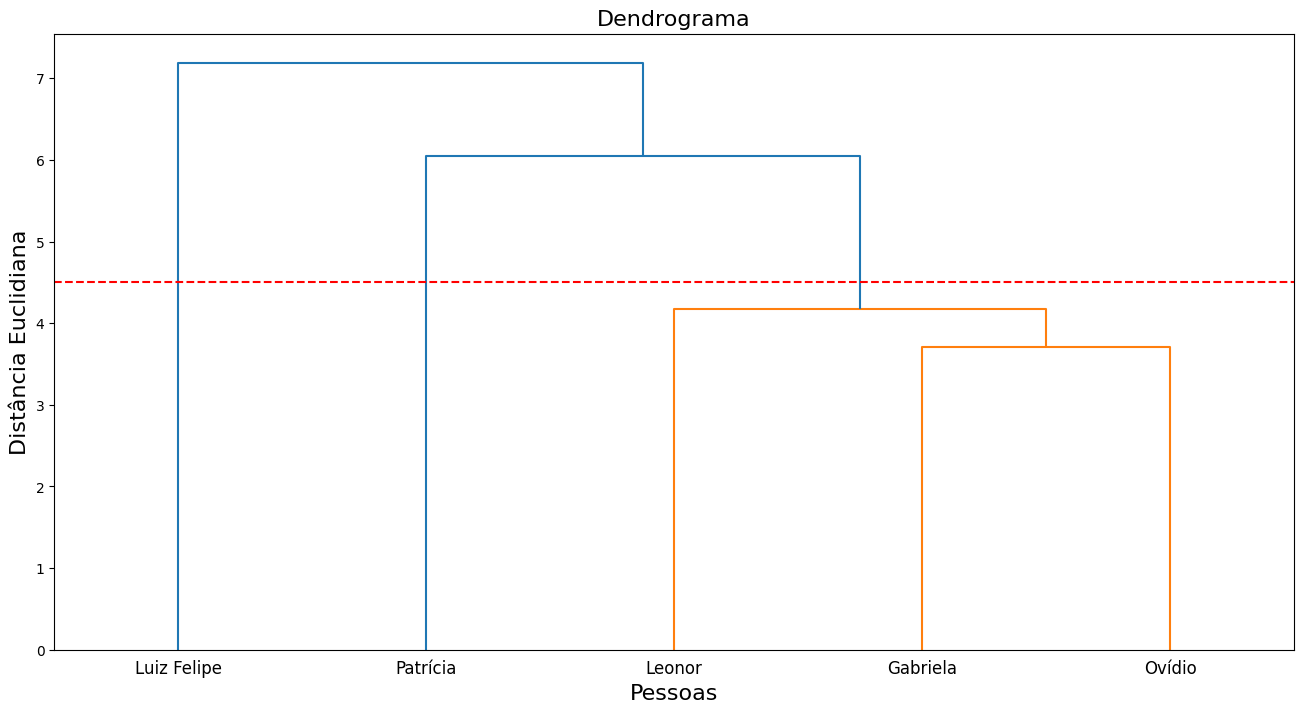

In [38]:
# Visualizando as distâncias.
dist_euclidiana = pdist(vest, metric='euclidean')

# Gerando o dendrograma.
plt.figure(figsize=(16,8))
dend_sing = sch.linkage(vest, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

In [20]:
# Gerando a variável com a indicação do cluster no dataset.
cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(vest)
dados_vest['cluster_single'] = indica_cluster_sing
dados_vest['cluster_single'] = dados_vest['cluster_single'].astype('category')

dados_vest

,estudante,matemática,física,química,cluster_single
0,Gabriela,3.7,2.7,9.1,0
1,Luiz Felipe,7.8,8.0,1.5,1
2,Patrícia,8.9,1.0,2.7,2
3,Ovídio,7.0,1.0,9.0,0
4,Leonor,3.4,2.0,5.0,0


In [21]:
# Coeficientes do esquema hierárquico de aglomeração (single).
coef_single = [y[1] for y in dendrogram_s['dcoord']]
coef_single

[3.713488925525428, 4.170131892398609, 6.044832503882965, 7.1867934435323795]

# Cluster hierárquico aglomerativo: distância euclidiana + complete linkage

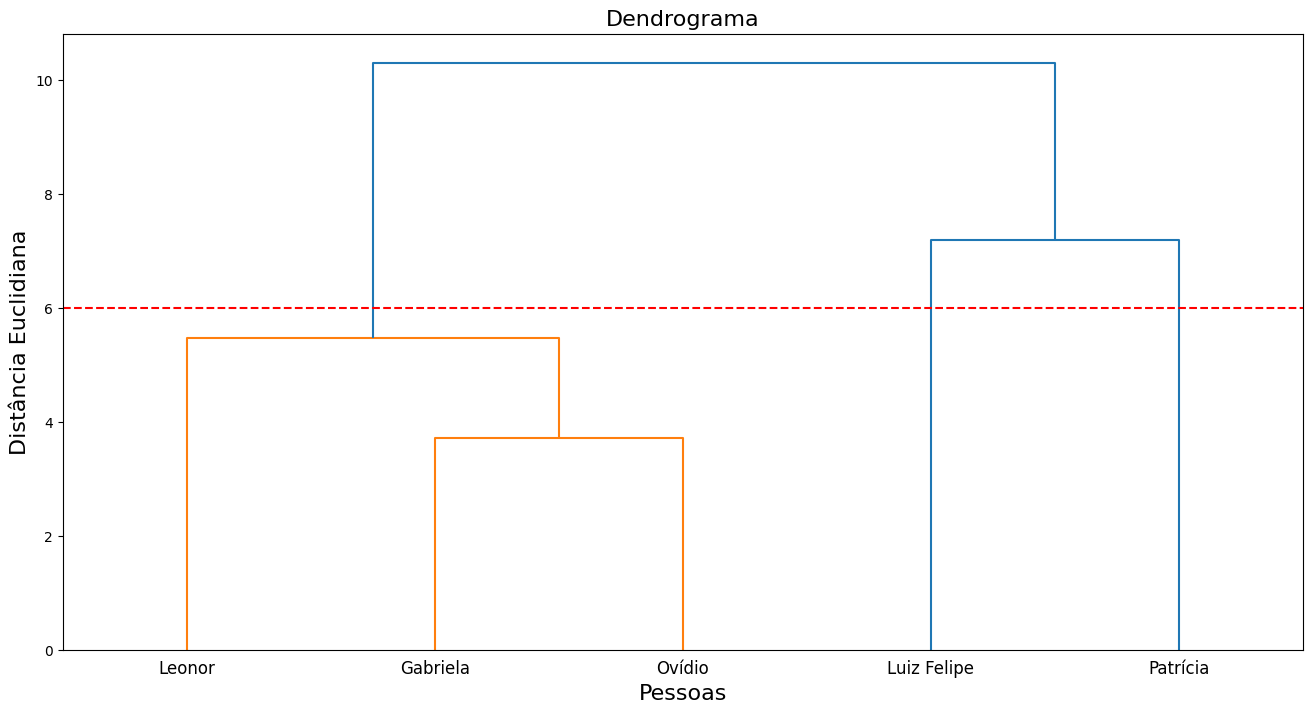

In [22]:
# Gerando o dendrograma.
plt.figure(figsize=(16,8))
dend_compl = sch.linkage(vest, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

In [23]:
# Gerando a variável com a indicação do cluster no dataset.
cluster_comp = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(vest)
dados_vest['cluster_complete'] = indica_cluster_comp
dados_vest['cluster_complete'] = dados_vest['cluster_complete'].astype('category')

dados_vest

,estudante,matemática,física,química,cluster_single,cluster_complete
0,Gabriela,3.7,2.7,9.1,0,0
1,Luiz Felipe,7.8,8.0,1.5,1,2
2,Patrícia,8.9,1.0,2.7,2,1
3,Ovídio,7.0,1.0,9.0,0,0
4,Leonor,3.4,2.0,5.0,0,0


In [26]:
# Coeficientes do esquema hierárquico de aglomeração (complete)
coef_complete = [y[1] for y in dendrogram_c['dcoord']]
coef_complete

[3.713488925525428, 5.473572873361603, 7.1867934435323795, 10.290286682109492]

# Cluster hierárquico aglomerativo: distância euclidiana + average linkage

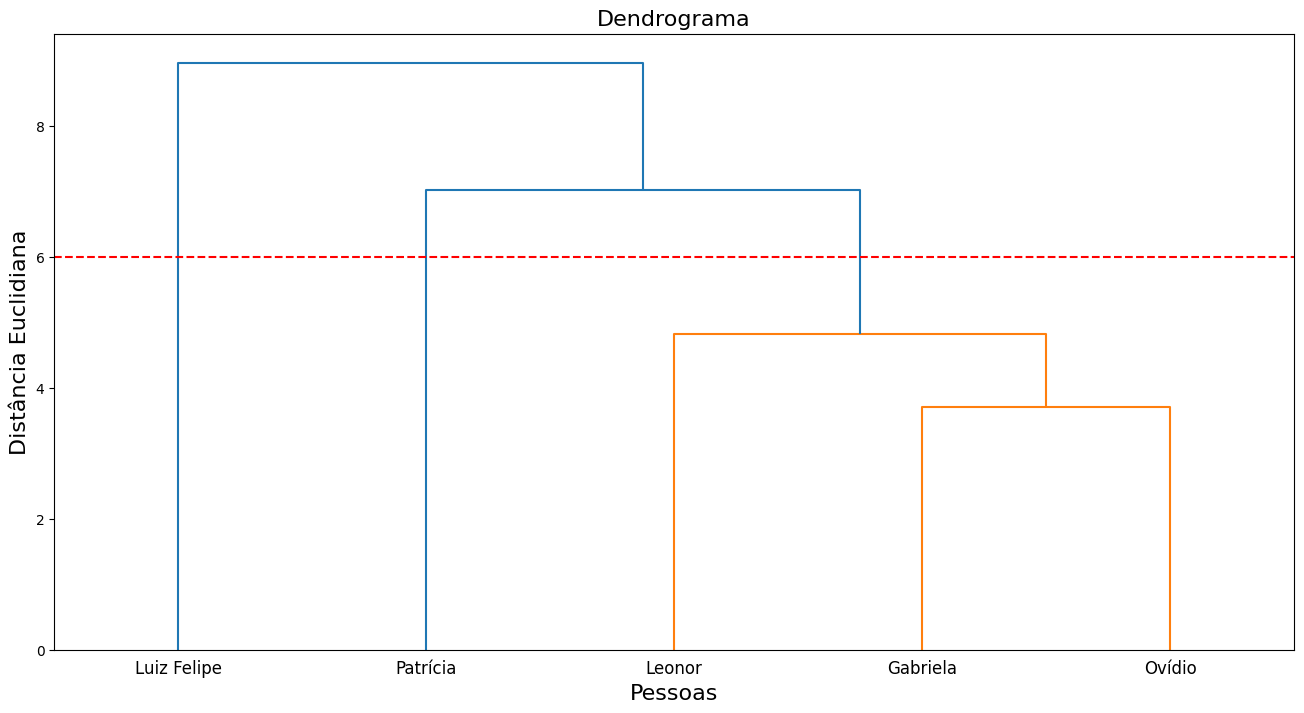

In [27]:
# Gerando o dendrograma.
plt.figure(figsize=(16,8))
dend_avg = sch.linkage(vest, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

In [41]:
# Gerando a variável com a indicação do cluster no dataset.
cluster_avg = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'average')
indica_cluster_avg = cluster_avg.fit_predict(vest)
dados_vest['cluster_average'] = indica_cluster_avg
dados_vest['cluster_average'] = dados_vest['cluster_average'].astype('category')

dados_vest

,estudante,matemática,física,química,cluster_single,cluster_complete,cluster_average,cluster_kmeans
0,Gabriela,3.7,2.7,9.1,0,0,0,2
1,Luiz Felipe,7.8,8.0,1.5,1,2,1,1
2,Patrícia,8.9,1.0,2.7,2,1,2,0
3,Ovídio,7.0,1.0,9.0,0,0,0,2
4,Leonor,3.4,2.0,5.0,0,0,0,2


In [42]:
# Coeficientes do esquema hierárquico de aglomeração (average)
coef_avg = [y[1] for y in dendrogram_a['dcoord']]
coef_avg

[3.713488925525428, 4.821852382880106, 7.014908666114838, 8.957934317775708]

# Cluster Não Hierárquico K-means

In [43]:
# Considerando que identificamos 3 possíveis clusters na análise hierárquica.
kmeans = KMeans(n_clusters=3, init='random', random_state=100).fit(vest)

# Gerando a variável para identificarmos os clusters gerados.
kmeans_clusters = kmeans.labels_
dados_vest['cluster_kmeans'] = kmeans_clusters
dados_vest['cluster_kmeans'] = dados_vest['cluster_kmeans'].astype('category')

dados_vest

,estudante,matemática,física,química,cluster_single,cluster_complete,cluster_average,cluster_kmeans
0,Gabriela,3.7,2.7,9.1,0,0,0,2
1,Luiz Felipe,7.8,8.0,1.5,1,2,1,1
2,Patrícia,8.9,1.0,2.7,2,1,2,0
3,Ovídio,7.0,1.0,9.0,0,0,0,2
4,Leonor,3.4,2.0,5.0,0,0,0,2


In [45]:
# Identificando as coordenadas centroides dos clusters finais.
cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = vest.columns
cent_finais.index.name = 'cluster'
cent_finais

,matemática,física,química
cluster,,,
0,8.9,1.0,2.7
1,7.8,8.0,1.5
2,4.7,1.9,7.7


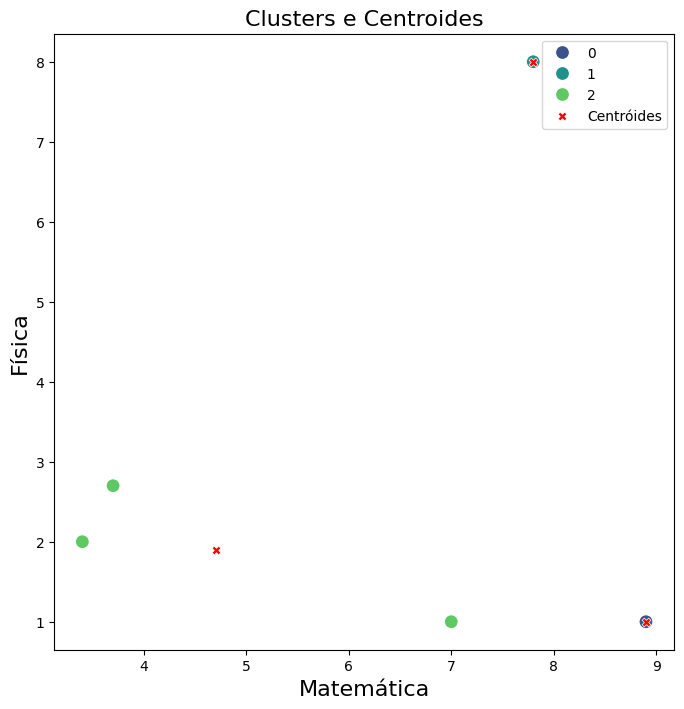

In [46]:
# Plotando as observações e seus centroides dos clusters.
plt.figure(figsize=(8,8))
sns.scatterplot(data=dados_vest, x='matemática', y='física', hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(data=cent_finais, x='matemática', y='física', c = 'red', label = 'Centróides', marker="X", s = 40)
plt.title('Clusters e Centroides', fontsize=16)
plt.xlabel('Matemática', fontsize=16)
plt.ylabel('Física', fontsize=16)
plt.legend()
plt.show()

## Identificação da quantidade de clusters

Método Elbow para identificação do nº de clusters.

Elaborado com base na "WCSS": distância de cada observação para o centroide de seu cluster.

Quanto mais próximos entre si e do centroide, menores as distâncias internas.

Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra".

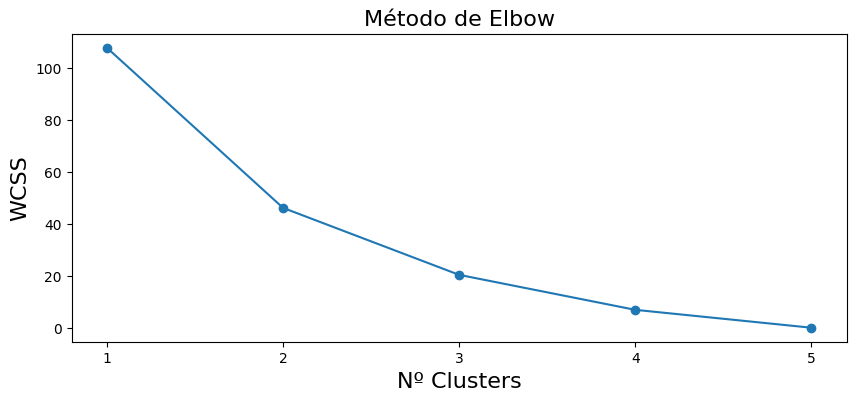

In [67]:
elbow = []
K = range(1,6) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(vest)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(10,4))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,6))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

## Análise de variância de um fator (ANOVA)

Interpretação do output:

- cluster_kmeans MS: indica a variabilidade entre grupos
- Within MS: indica a variabilidade dentro dos grupos
- F: estatística de teste (cluster_kmeans MS / Within MS)
- p-unc: p-valor da estatística F

Se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais.

- A variável mais discriminante contém a maior estatística F (e significativa).
- O valor da estatística F é sensível ao tamanho da amostra.

In [ ]:
# Matemática
pg.anova(dv='matemática', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

# Física
pg.anova(dv='física', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

# Química
pg.anova(dv='química', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

In [68]:
# Gráfico 3D dos clusters.
fig = px.scatter_3d(dados_vest, x='matemática', y='química', z='física',color='cluster_kmeans', text=dados_vest.estudante)
fig.show()